# **SEMMA Methodology on Airplane Ticket Price Prediction Dataset**
This notebook walks through the SEMMA methodology for analyzing and predicting airplane ticket prices. The dataset includes flight details such as airline, source, destination, duration, and price.

## **Step 1: Sample**
The **Sample** step involves selecting a representative subset of the data to ensure it reflects the overall patterns without overwhelming the analysis.
- **Objective**: To create a manageable dataset for analysis.
- **Method**: We use stratified random sampling to ensure all categories are represented.

In [ ]:
#upload the csv from local
from google.colab import files
uploaded = files.upload()

Saving Data_Train.xlsx to Data_Train.xlsx


In [ ]:
# Sample the data
import pandas as pd

# Load the dataset xlsx
data = pd.read_excel('Data_Train.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
# 20% Stratified Sample
sample_data = data.sample(frac=0.2, random_state=42)
sample_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6076,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,05:45,18:15,12h 30m,1 stop,In-flight meal not included,10844
3544,GoAir,3/06/2019,Delhi,Cochin,DEL → BOM → COK,10:35,19:35,9h,1 stop,No info,4959
7313,Jet Airways,1/05/2019,Kolkata,Banglore,CCU → BOM → BLR,14:05,19:50,5h 45m,1 stop,No info,14781
5032,IndiGo,24/05/2019,Chennai,Kolkata,MAA → CCU,14:45,17:05,2h 20m,non-stop,No info,3858
2483,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,22:50,04:25 22 May,5h 35m,1 stop,In-flight meal not included,12898


## **Step 2: Explore**
This step focuses on understanding the dataset by calculating statistics and visualizing patterns.
- **Descriptive Statistics**: Summarize numerical and categorical data.
- **Data Visualization**: Use histograms, box plots, and correlation heatmaps to uncover relationships.

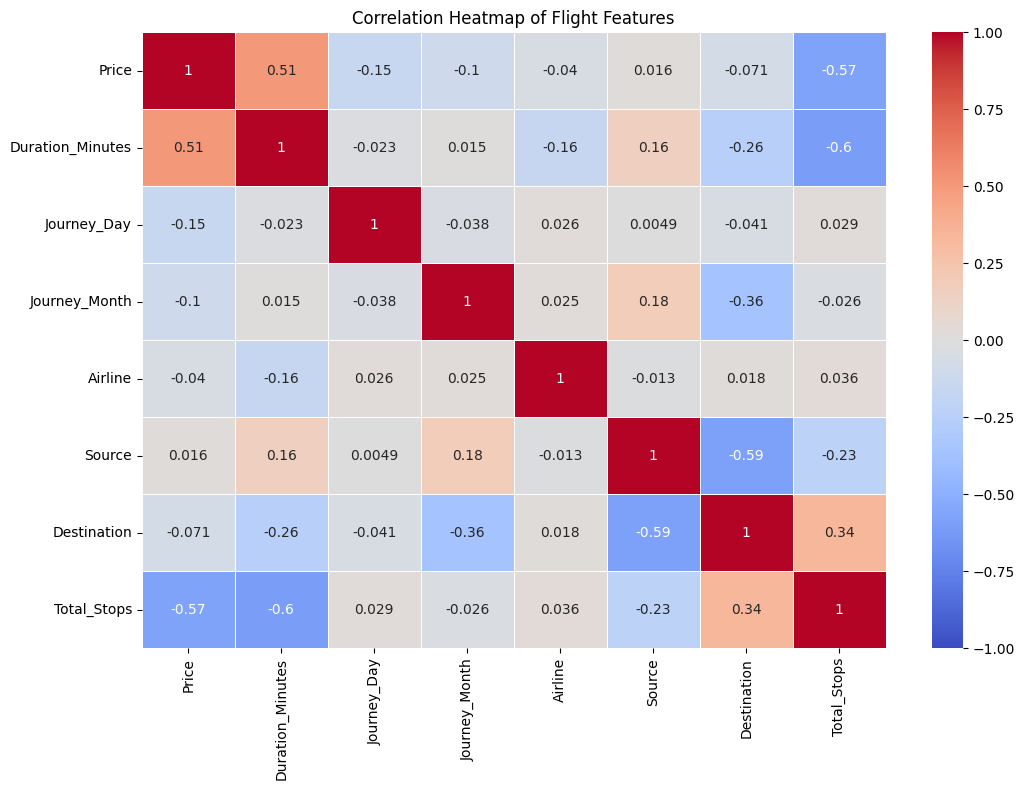

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Feature Engineering: Convert 'Duration' to total minutes
def convert_duration(duration):
    hours, mins = 0, 0
    if 'h' in duration:
        hours = int(duration.split('h')[0])
    if 'm' in duration:
        mins = int(duration.split('h')[-1].replace('m', ''))
    return hours * 60 + mins

data['Duration_Minutes'] = data['Duration'].apply(convert_duration)

# Extract day and month from 'Date_of_Journey'
data['Journey_Day'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y').dt.day
data['Journey_Month'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y').dt.month

# Use Label Encoding for relevant categorical features
label_encoders = {}
for col in ['Airline', 'Source', 'Destination', 'Total_Stops']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Save encoders if needed for future use

# Select only meaningful numerical and encoded columns
corr_data = data[['Price', 'Duration_Minutes', 'Journey_Day', 'Journey_Month',
                  'Airline', 'Source', 'Destination', 'Total_Stops']]

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap of Flight Features')
plt.show()

## **Step 3: Modify**
Transform and prepare the data for modeling by selecting relevant features and handling missing values.
- **Feature Engineering**: Convert `Duration` to minutes.
- **Imputation**: Fill missing values.
- **Scaling**: Normalize numerical features if necessary.

In [16]:
# Feature Engineering - Convert 'Duration' to total minutes
def convert_duration(duration):
    # Initialize hours and minutes to 0
    hours, mins = 0, 0

    # Handle different cases in the 'Duration' column
    if 'h' in duration:
        hours = int(duration.split('h')[0])
    if 'm' in duration:
        mins = int(duration.split('m')[0].split()[-1])

    # Calculate total minutes
    return hours * 60 + mins

# Apply the 'convert_duration' function to the 'Duration' column
data['Duration_Minutes'] = data['Duration'].apply(convert_duration)

# Handle missing values: Only fill numeric columns with their mean values
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Display the modified data
data.head()

# Display the modified data
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Minutes,Journey_Day,Journey_Month
0,3,24/03/2019,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,4,No info,3897,170,24,3
1,1,1/05/2019,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,1,No info,7662,445,1,5
2,4,9/06/2019,2,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,1,No info,13882,1140,9,6
3,3,12/05/2019,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,0,No info,6218,325,12,5
4,3,01/03/2019,0,5,BLR → NAG → DEL,16:50,21:35,4h 45m,0,No info,13302,285,1,3


## **Step 4: Model**
Select and train models on the prepared data.
- **Model Selection**: Random Forest for prediction.
- **Training and Testing**: Split the data into training and testing sets.
- **Model Evaluation**: Use performance metrics such as MAE and R².

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Ensure all necessary feature engineering is done
def convert_duration(duration):
    """Convert 'Duration' from hours and minutes to total minutes."""
    try:
        hours, mins = 0, 0
        if 'h' in duration:
            hours = int(duration.split('h')[0])
        if 'm' in duration:
            mins = int(duration.split('m')[0].split()[-1])
        return hours * 60 + mins
    except Exception as e:
        print(f"Error converting duration: {e}, value: {duration}")
        return 0  # Default to 0 minutes if conversion fails

# Apply conversion only if the 'Duration' column exists
if 'Duration' in data.columns:
    data['Duration_Minutes'] = data['Duration'].apply(convert_duration)
    data = data.drop('Duration', axis=1)  # Drop 'Duration' after conversion

# Safely handle 'Total_Stops' column if it exists
if 'Total_Stops' in data.columns:
    # Ensure all values are strings before splitting
    data['Total_Stops'] = data['Total_Stops'].astype(str).replace('non-stop', '0 stops')
    data['Total_Stops'] = data['Total_Stops'].str.split(' ').str[0].astype(int)

# Drop unnecessary columns if they exist
columns_to_drop = ['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Additional_Info']
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns], axis=1)

# Encode categorical columns
for col in ['Airline', 'Source', 'Destination']:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

# Define features and target
X = data.drop('Price', axis=1, errors='ignore')  # Features
y = data['Price']  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}, R²: {r2}')

MAE: 1371.4464201860073, R²: 0.7563351645386118


## **Step 5: Assess**
Evaluate the effectiveness of the model.
- **Residual Analysis**: Check the distribution of residuals.
- **Feature Importance**: Understand which features contributed the most to the predictions.

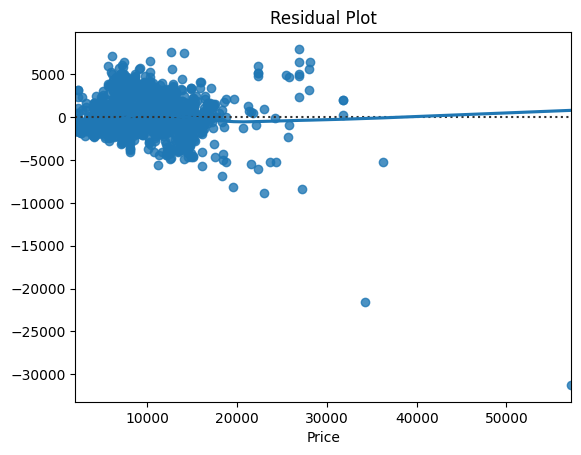

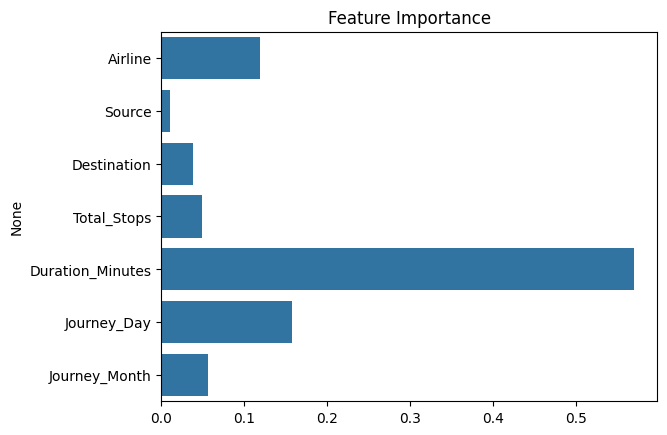

In [24]:
# Assess the model
sns.residplot(x=y_test, y=y_pred, lowess=True)
plt.title('Residual Plot')
plt.show()

# Feature importance
importances = model.feature_importances_
sns.barplot(x=importances, y=X.columns)
plt.title('Feature Importance')
plt.show()

## **Conclusion**
This notebook demonstrates the SEMMA methodology on the airplane ticket price dataset. By following Sampling, Exploring, Modifying, Modeling, and Assessing, we developed insights and predictions from the data.